In [2]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.utils import shuffle


In [29]:
pip install timm

  Obtaining dependency information for timm from https://files.pythonhosted.org/packages/14/38/05b37b7692e521bbada22593ac3b6d7ba3f378d56b5d1ccb322a541bbb6e/timm-0.9.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.4 MB/s eta 0:00:00
  Obtaining dependency information for pyyaml from https://files.pythonhosted.org/packages/c8/6b/6600ac24725c7388255b2f5add93f91e58a5d7efaf4af244fdbcc11a541b/PyYAML-6.0.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for huggingface-hub from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Obtaining dependency information for safetensors from https://files.pythonhosted.org/packages/4d/81/9b6ee8bd7faf7ae79afafde28b4e8abbcb897c9aa089d51eb5d0a1f3ffcd/safetensors-0.3.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency info

In [31]:
import timm

/home/jupyter-veldandi/.conda/envs/torch_2.0.1/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sorted(os.listdir('/mura'))

['Cropped-mrkr',
 'MRKR_csv_files',
 'NIH_OAI_xray',
 'NIH_OAI_xray_cropped',
 'datathon_MRKR_KLG.csv',
 'datathon_MRKR_demographics.csv',
 'datathon_MRKR_icd.csv',
 'datathon_MRKR_imaging_distilled.csv',
 'datathon_MRKR_pain.csv',
 'mura_mdai_redacted']

In [26]:
image_df = pd.read_csv('/mura/datathon_MRKR_imaging_distilled.csv')

In [5]:
klg_df = pd.read_csv('/mura/datathon_MRKR_KLG.csv')
icd_df = pd.read_csv('/mura/datathon_MRKR_icd.csv')
pain_df = pd.read_csv('/mura/datathon_MRKR_pain.csv')
demographics_df = pd.read_csv('/mura/datathon_MRKR_demographics.csv')

In [6]:
icd_df.columns.tolist()

['empi_anon',
 'encounter_anon',
 'diagnosis_date_anon',
 'DX_CODE_ICD9',
 'DX_CODE_ICD10',
 'DX_CODE',
 'DX_NAME',
 'knee_osteoarthritis',
 'general_osteoarthritis',
 'trauma_lower_extremity',
 'diabetes',
 'hypertension',
 'joint_infection',
 'osteomyelitis',
 'autoimmune']

In [7]:
demographics_df

,empi_anon,DOB_anon,GENDER,RACE,ETHNICITY
0,10001182,1958-05-05 00:00:00,Male,"Unknown, Unavailable or Unreported","Unreported, Unknown, Unavailable"
1,10001758,1980-06-11 00:00:00,Female,Multiple,"Unreported, Unknown, Unavailable"
2,10002144,1978-07-21 00:00:00,Female,Caucasian or White,Non-Hispanic or Latino
3,10003180,1950-04-19 00:00:00,Female,Caucasian or White,Non-Hispanic or Latino
4,10005139,1968-02-21 00:00:00,Female,African American or Black,Non-Hispanic or Latino
...,...,...,...,...,...
88667,99994039,1978-06-26 00:00:00,Male,Caucasian or White,Non-Hispanic or Latino
88668,99995357,1951-05-27 00:00:00,Female,African American or Black,Non-Hispanic or Latino
88669,99995943,2001-10-25 00:00:00,Male,"Unknown, Unavailable or Unreported","Unreported, Unknown, Unavailable"
88670,99996622,1937-04-10 00:00:00,Female,African American or Black,Non-Hispanic or Latino


In [8]:
demographics_df['dob'] = pd.to_datetime(demographics_df['DOB_anon'])
current_date = pd.to_datetime("2023-08-19")
# Calculate age
demographics_df['age'] = (current_date - demographics_df['dob']).dt.days // 365.25

In [9]:
demographics_df = demographics_df[demographics_df['age']<90]

In [10]:
demographics_df = demographics_df[demographics_df['age']>=30]

<Axes: >

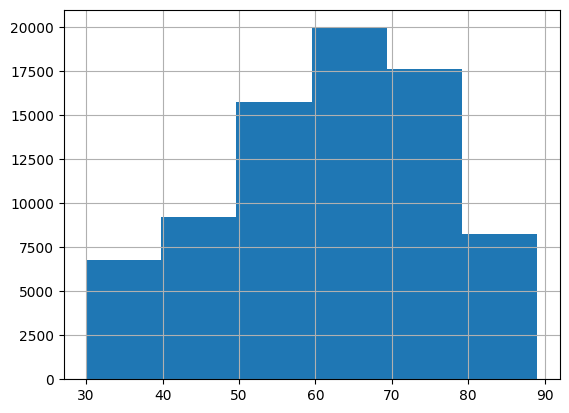

In [11]:
demographics_df.age.hist(bins=6)

In [12]:
icd_df.DX_NAME.value_counts()

DX_NAME
Pain in joint involving lower leg                          66963
Osteoarthrosis, localized, primary, involving lower leg    64633
Not Recorded                                               50290
Unspecified essential hypertension                         37830
Pain in limb                                               21107
                                                           ...  
Blindness, one eye; low vision other eye                       1
Malignant neoplasm of accessory sinus, unspecified             1
Hereditary edema of legs                                       1
Unspecified disorder of prostate                               1
Other otorrhea                                                 1
Name: count, Length: 5021, dtype: int64

In [13]:
icd_df

,empi_anon,encounter_anon,diagnosis_date_anon,DX_CODE_ICD9,DX_CODE_ICD10,DX_CODE,DX_NAME,knee_osteoarthritis,general_osteoarthritis,trauma_lower_extremity,diabetes,hypertension,joint_infection,osteomyelitis,autoimmune
0,10002144,147670985,2018-01-20 00:00:00,136.1,M35.2,136.1,Behcet's syndrome,0,0,0,0,0,0,0,0
1,10002144,147670985,2018-02-13 00:00:00,715.16,M17.11,715.16,"Osteoarthrosis, localized, primary, involving ...",1,1,0,0,0,0,0,0
2,10002144,147670985,2018-02-13 00:00:00,715.16,M17.12,715.16,"Osteoarthrosis, localized, primary, involving ...",1,1,0,0,0,0,0,0
3,10002144,147670985,2018-02-13 00:00:00,719.45,M25.551,719.45,Pain in joint involving pelvic region and thigh,0,0,0,0,0,0,0,0
4,10002144,147670985,2018-02-13 00:00:00,719.45,M25.552,719.45,Pain in joint involving pelvic region and thigh,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244036,99996622,818136982,2018-03-02 00:00:00,723.1,M54.2,723.1,Cervicalgia,0,0,0,0,0,0,0,0
1244037,99996622,818136982,2018-03-02 00:00:00,728.85,M62.838,728.85,Spasm of muscle,0,0,0,0,0,0,0,0
1244038,99996622,818136982,2018-03-02 00:00:00,V12.49,Z86.69,V12.49,Personal history of other disorders of nervous...,0,0,0,0,0,0,0,0
1244039,99996622,818136982,2018-03-02 00:00:00,--,Z98.890,--,Not Recorded,0,0,0,0,0,0,0,0


In [14]:
icd_df.insert(15, "osteoporosis",0)

In [15]:
icd_df.osteoporosis.loc[(icd_df.DX_CODE_ICD10.str.contains("M80")) | (icd_df.DX_CODE_ICD10.str.contains("M81")) | (icd_df.DX_CODE_ICD10.str.contains("M82")) | (icd_df.DX_CODE_ICD10.str.contains("M83"))  | (icd_df.DX_CODE_ICD10.str.contains("M84")) | (icd_df.DX_CODE_ICD10.str.contains("M85"))] =1



/tmp/ipykernel_650737/701161849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icd_df.osteoporosis.loc[(icd_df.DX_CODE_ICD10.str.contains("M80")) | (icd_df.DX_CODE_ICD10.str.contains("M81")) | (icd_df.DX_CODE_ICD10.str.contains("M82")) | (icd_df.DX_CODE_ICD10.str.contains("M83"))  | (icd_df.DX_CODE_ICD10.str.contains("M84")) | (icd_df.DX_CODE_ICD10.str.contains("M85"))] =1


In [16]:
icd_df

,empi_anon,encounter_anon,diagnosis_date_anon,DX_CODE_ICD9,DX_CODE_ICD10,DX_CODE,DX_NAME,knee_osteoarthritis,general_osteoarthritis,trauma_lower_extremity,diabetes,hypertension,joint_infection,osteomyelitis,autoimmune,osteoporosis
0,10002144,147670985,2018-01-20 00:00:00,136.1,M35.2,136.1,Behcet's syndrome,0,0,0,0,0,0,0,0,0
1,10002144,147670985,2018-02-13 00:00:00,715.16,M17.11,715.16,"Osteoarthrosis, localized, primary, involving ...",1,1,0,0,0,0,0,0,0
2,10002144,147670985,2018-02-13 00:00:00,715.16,M17.12,715.16,"Osteoarthrosis, localized, primary, involving ...",1,1,0,0,0,0,0,0,0
3,10002144,147670985,2018-02-13 00:00:00,719.45,M25.551,719.45,Pain in joint involving pelvic region and thigh,0,0,0,0,0,0,0,0,0
4,10002144,147670985,2018-02-13 00:00:00,719.45,M25.552,719.45,Pain in joint involving pelvic region and thigh,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244036,99996622,818136982,2018-03-02 00:00:00,723.1,M54.2,723.1,Cervicalgia,0,0,0,0,0,0,0,0,0
1244037,99996622,818136982,2018-03-02 00:00:00,728.85,M62.838,728.85,Spasm of muscle,0,0,0,0,0,0,0,0,0
1244038,99996622,818136982,2018-03-02 00:00:00,V12.49,Z86.69,V12.49,Personal history of other disorders of nervous...,0,0,0,0,0,0,0,0,0
1244039,99996622,818136982,2018-03-02 00:00:00,--,Z98.890,--,Not Recorded,0,0,0,0,0,0,0,0,0


In [17]:
icd_df.osteoporosis.value_counts()

osteoporosis
0    1238628
1       5413
Name: count, dtype: int64

In [23]:
icd_df.osteoporosis.value_counts(normalize=True)

osteoporosis
0    0.995649
1    0.004351
Name: proportion, dtype: float64

In [24]:
# what diagnosis should we include? What diagnosis should we exclude?

icd_df[['knee_osteoarthritis',
 'general_osteoarthritis',
 'trauma_lower_extremity',
 'diabetes',
 'hypertension',
 'joint_infection',
 'osteomyelitis',
 'autoimmune','osteoporosis']]

,knee_osteoarthritis,general_osteoarthritis,trauma_lower_extremity,diabetes,hypertension,joint_infection,osteomyelitis,autoimmune,osteoporosis
0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1244036,0,0,0,0,0,0,0,0,0
1244037,0,0,0,0,0,0,0,0,0
1244038,0,0,0,0,0,0,0,0,0
1244039,0,0,0,0,0,0,0,0,0


In [25]:
remove_empi_list = icd_df[(icd_df.joint_infection==1) | (icd_df.osteomyelitis==1) | (icd_df.autoimmune==1) | (icd_df.osteoporosis==1)].empi_anon.unique().tolist()



In [27]:
image_df=image_df[~image_df.empi_anon.isin(remove_empi_list)]
icd_df=icd_df[~icd_df.empi_anon.isin(remove_empi_list)]
klg_df=klg_df[~klg_df.empi_anon.isin(remove_empi_list)]
pain_df=pain_df[~pain_df.empi_anon.isin(remove_empi_list)]
demographics_df=demographics_df[~demographics_df.empi_anon.isin(remove_empi_list)]


In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_transformations = monai.transforms.Compose([mn.transform.LoadImage(keys=["image"]),
    mn.transforms.AddChannelD(keys=["image"]),
    mn.transforms.NormalizeIntensityD(keys="image"),
    mn.transforms.RandFlipd(keys=['image'], prob=0.5, spatial_axis=[0]),
    mn.transforms.RandAffineD(
       keys=["image"],
       translate_range=(15,15),
       scale_range=(0.05,0.05),
        rotate_range=(math.pi/8,math.pi/8),
        padding_mode='zerosi',
        prob=0.5),
        # as_tensor_output=False),
    mn.transforms.RandGaussianNoised(keys="image", prob=0.5, mean=0.0, std=0.2),
    mn.transforms.ToTensord(keys=["image","label"]),
])

val_transformations = monai.transforms.Compose([mn.transform.LoadImage(keys=["image"]),
    mn.transforms.AddChannelD(keys=["image"]),
    mn.transforms.NormalizeIntensityD(keys="image"),
    mn.transforms.ToTensord(keys=["image","label"]),
])


In [ ]:
train_ds = mn.data.Dataset(data=train_list, transform=train_transforms)
val_ds = mn.data.Dataset(data=val_list, transform=val_transforms)

In [ ]:
train_loader = DataLoader(train_ds, batch_size=4,shuffle=True)
val_loader = DataLoader(val_ds, batch_size=1 )

In [ ]:
model = mn.networks.nets.DenseNet121(spatial_dims=3, in_channels=1, out_channels=2).to(device)

In [ ]:
model = mn.networks.nets.ResNet(block, layers, block_inplanes, spatial_dims=3, n_input_channels=3, conv1_t_size=7, conv1_t_stride=1, no_max_pool=False, shortcut_type='B', widen_factor=1.0, num_classes=400, feed_forward=True, bias_downsample=True)

In [32]:
model = timm.create_model('resnet18', pretrained = True, num_classes = 4).to('cuda')

In [36]:
import torch.nn as nn
import torch.optim as optim

# Assuming you have 'output' as the model's output and 'target' as the ground truth labels
loss = nn.CrossEntropyLoss()

In [38]:
# Define your optimizer
learning_rate = 0.001
weight_decay = 1e-5
optimizer = optim.Adam(model.parameters(), lr=learning_rate,  weight_decay=weight_decay)

In [ ]:
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Clear gradients from the previous iteration

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backpropagation
    loss.backward()

    # Update weights
    optimizer.step()

    # Print training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')\